# Functions (again)

### Anonymous functions

Sometimes it is convenient to define a function in one line, without a name (for example because you intend to use it once). This is done with an arrow.

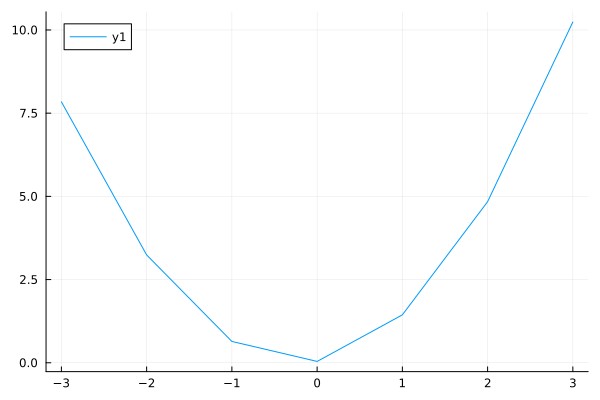

In [1]:
using Plots
plot(-3:3, (x->(x+0.2)^2).(-3:3))

How does the code above work?
 - `(x->(x+0.2)^2)` defines the anonymous function
 - the dot `.` creates the broadcasted version
 - so now we can apply it on a range: `(x->(x+0.2)^2).(-3:3)`

For clarity, this would have been the verbose version:

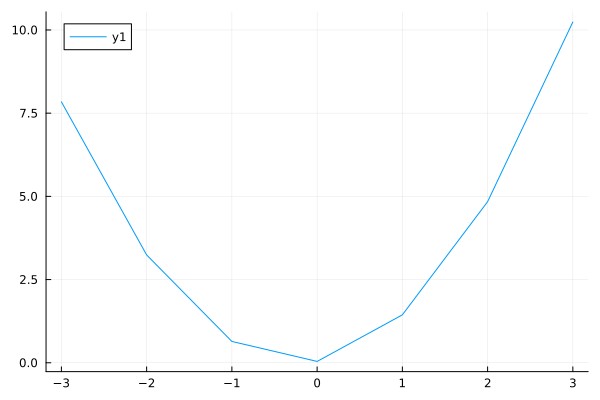

In [2]:
function f(x)
    return (x+0.2)^2
end

plot(-3:3, f)

### One-liner function definition

Sometimes we do want to give the function a name, but using three lines like this

```julia
function f(x)
    return x+x^2
end
```

feels too long. This works instead:

In [3]:
f(x) = x+x^2
f(3)

12

### Keyword arguments

Often it feels tiring to give all inputs to a function, especially when some arguments have natural defaults. How to give defaults to certain arguments?    

Like this:

```julia
function fname(main_arg; extra_arg = default)
    stuff
end
```

* calling `fname(x)` calls the function with `main_arg` being `x` and `extra_arg` taking its default value
* calling `fname(x; extra_arg = y)` or `fname(x, extra_arg = y)` calls the function with `main_arg` being `x` and `extra_arg` taking value `y` instead of the default.

Note that apart from keyword arguments, there is also support for optional arguments in Julia. It's a fairly similar concept (keyword arguments being more flexible), so I just skip talking about that.

In [4]:
function square_or_other_power(x; exponent = 2)
    return x^exponent
end

square_or_other_power(3)


9

replace the default for number of digits with 5:

In [5]:
square_or_other_power(3; exponent = 5)

243

when calling the function, `,` also works instead of `;`

In [6]:
square_or_other_power(3, exponent = 5)

243

### Type annotations - optional

Defining a function as

```julia
function fname(arg1::Type1, arg2::Type2, ...)
    body
end
```

specifies that this method can be called if `argi` is of type `Typei` (if `Typei` is a primitive type) or the type of `argi` is subtype of `Typei` (otherwise) for all $i$. Calling a function with arguments of the wrong type would result in an error. In general, it is **not** obligatory to use such type annotations. Skipping a type annotation is equivalent to setting it to `Any`, so any input would be allowed (`Any` is and abstract type which is the supertype of all types, so it is the end of the "type-tree"). Is a good idea though to use type annotations? Depends:

Pro:
 - You **have to** give type annotations if different methods of the same function exist. In this case, you have to specify which method should be called for which input types.
 - Type annotations can make it more clear to the user/you, what the function is used for.
 - More fool-proof: throws error immediately when not the intended kind of input is given.

Con:
 - Resulting code is less general. Maybe less general than it could be.
 - More characters &rarr; less clear. Especially for simple functions looks like an overkill.
 - Takes effort.
